# <center>Predicting best Location to open Asian Restaurant in London</center>

## Introduction

As a restaurant owner, to find the perfect location to help make your operation a true success. It’s important to remember that a restaurant’s location is as important to its success as great food and service. You should really put location at the top of your to to-do list and start looking right away.

If you can define your restaurant type and identify your target demographic and its most populated areas, you’ll be well on your way to choosing a restaurant location that sets your business up for success. There’s a lot of work, planning and preparation that goes into opening a restaurant. Here are a few tips on how to open a restaurant in London and some steps you’ll need to take in order to achieve your goal.

                        1.	Restaurant style.
                        2.	Target Market.
                        3.	Who are your competitors.
                        4.	Create your menu.
                        5.	Location and Premises.
                        6.	Parking Lot.
                        7.	Transportation.

### Data Description:
    
London is one of the most ethnically diverse cities in the world. At the 2011 census, London had a population of 8,173,941.The demography of London is analysed by the Office for National Statistic and data is produced for each of the Greater London wards, the City of London and the 32 London boroughs, the Inner London and Outer London statistical sub-regions, each of the Parliamentary constituencies in London, and for all of Greater London as a whole.

For our restaurant problem, we will focus on the Boroughs of London and work on getting the data from all the Boroughs. There are 32 London Boroughs with a population of around 150,000 to 300,000.

To solve our problem of finding a best location to start an Asian restaurant in London, we need the datasets based on various parameters such as:
1.	Population of target audience in all the boroughs of London based on their:
        • Asian ethnicity<br>
        • Age<br>
        • Gender<br>
        • Marital Status<br>
        • Employment Status<br>
        • Income<br>
2.	We also need the data about the required Business floor space and Rateable Value Statistics of each borough.
3.	Considering the competitors factor, we also need the data of existing Licensed Restaurants in each borough.
4.	And lastly we will also consider the borough level tourist and domestic annual spend estimates.

All the required information is available at LONDON DATASTORE, which is a free and open data-sharing portal where anyone can access data relating to the city. The data is available in XLS and CSV format, which we can download and can use as-is for solving our problem.

The link for the LONDON DATASTORE, – 
https://data.london.gov.uk/ or 
https://data.london.gov.uk/census/data/


<h2> Table of content </h2>

Part 1: To find the best Borough to get a best location to start an Asian restaurant in London.</li>

<ol>
    <li><a>Download and Read the data</a>
          <ol>
            <li><a>Population by Ethinicity</a></li>
            <li><a>Weekly Earning data of asian Ethinicity in each borough</a></li>
            <li><a>Licensed Restaurants in each borough</a></li>
            <li><a>Rated Value per Sqm of retail space in each borough</a></li>
          </ol>
    <li><a>Data Wrangling(Data Cleaning and Preparation)</a>
          <ol>
             <li><a>Earning dataframe</a>
             <li><a>Licensed Restaurant</a>
             <li><a>Rated Value</a>                
          </ol>
     <li><a>Data Exploration</a>
          <ol>
             <li><a>Merge all 3 data frames</a>
             <li><a>Visualize final data</a>              
          </ol> 
     <li><a>Model Development (Machine Learning)</a>
          <ol>
             <li><a>Simple Linear Regression</a>
             <li><a>Training and Testing data</a>
             <li><a>Coefficent and intercept</a> 
          </ol>
      <li><a>Evaluation</a>
</ol>

Part: 2 Create a new dataframe which contains Postcode, Borough, and Neighborhood

<ol>
    <li><a>Download and Read data of list_of_london_boroughs</a>
          <ol>
            <li><a>Read List of London boroughs data from wikipedia Page using beautifulsoup package</a></li>
            <li><a>Create a for loop for itterating through the table to find the table data(Borough and Co-ordinates)</a></li>
            <li><a>Create a Dataframe which contain Borough, Latitude and Longitude</a></li>
          </ol>
    <li><a>Get the Latitude and Longitude of London City using geopy, Nominatim library</a>
    <li><a>Create a map of London with Boroughs superimposed on top using Folium Library</a>
</ol>

Part 3: Segmentation and Clustering(Newham)
<ol>
    <li><a>Downlaod and read the data from List_of_areas_of_london</a>
          <ol>
            <li><a>Read the data of all the neighborhoods(areas) in Newham Borough</a></li>
            <li><a>Read Table data from List_of_areas_of_london for Newham Borough</a></li>
            <li><a>Create New dataframe for list of Borough(Newham) and its Neigborhood</a></li>
          </ol>
    <li><a>Using OpenCageGeocode,find the lat and long of all areas of Newham borough</a>
    <li><a>Find the Lat and long of Newham using Nominatim</a>
    <li><a>Create map of Newham using latitude and longitude values from above data frame</a>
    <li><a>Define Foursquare credentials</a>
          <ol>
             <li><a>Explore Neighborhoods in Newham Borough</a>
          </ol>
      <li><a>Analyze Each Neighborhood</a>
          <ol>
             <li><a>Use one hot encoding</a>
          </ol>
      <li><a>Cluster Neighborhoods</a>
          <ol>
             <li><a>Run K-means algorithm to cluster the neighborhood into 5 clusters</a>
          </ol>
</ol>

Part: 4. Visualization
<ol>
    <li><a>Visualization using Matplotlib</a>
    <li><a>Create map of clusters</a>
</ol>

Part:5 Examine the Clusters

# Part 1: To find the best Borough to get a best location to start an Asian restaurant in London.

### Import Required modules and libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

## 1. Download and Read the data

### 1.1 Read the "Population by ethinicty" data into a Pandas DataFrame.
Note: We have collected the Ethnic population of only 5 Asian Countries (India, Pakistan, China, Bangladesh and Srilanka) who are living in 33 Boroughs of London.

In [2]:
df_pop=pd.read_excel(r"C:\Users\user\Desktop\Capstone Project\Population_data.xlsx")
print(df_pop.shape)
df_pop.head()

(33, 9)


,Code,Borough,2012,2013,2014,2015,2016,2017,2018
0,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,41000.0,41000.0,48000.0,54000.0
2,E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,57000.0,57000.0
3,E09000004,Bexley,8000.0,7000.0,10000.0,15000.0,18000.0,16000.0,17000.0
4,E09000005,Brent,109000.0,110000.0,99000.0,108000.0,106000.0,101000.0,107000.0


**As we can see, City of London Borough data is NOT AVAILABLE,so we need to drop that row**

In [3]:
df_pop=df_pop.dropna()

**Set the Code Column as Index**

In [4]:
df_pop = df_pop.set_index(['Code']) 
print(df_pop.shape)
df_pop.head()

(32, 8)


,Borough,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,
E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,41000.0,41000.0,48000.0,54000.0
E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,57000.0,57000.0
E09000004,Bexley,8000.0,7000.0,10000.0,15000.0,18000.0,16000.0,17000.0
E09000005,Brent,109000.0,110000.0,99000.0,108000.0,106000.0,101000.0,107000.0
E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0,15000.0


We have the population data of 7 years from 2012 to 2018, So to get the Current population of the Asians living in London,we will calculate the average of the existing population.

Lets create a New column __Population__ and use __round()__ to Round off the values in Population column to match the existing data in our dataset

In [5]:
df_pop['Population'] = df_pop.mean(numeric_only=True, axis=1).round()
print(df_pop.shape)
df_pop.head()

(32, 9)


,Borough,2012,2013,2014,2015,2016,2017,2018,Population
Code,,,,,,,,,
E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,41000.0,41000.0,48000.0,54000.0,39429.0
E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,57000.0,57000.0,56857.0
E09000004,Bexley,8000.0,7000.0,10000.0,15000.0,18000.0,16000.0,17000.0,13000.0
E09000005,Brent,109000.0,110000.0,99000.0,108000.0,106000.0,101000.0,107000.0,105714.0
E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0,15000.0,19000.0


**Lets find the Borough, that has highest population**

In [6]:
df_pop.loc[df_pop['Population'].idxmax()] # idxmax() function returns index of first occurrence of maximum over requested axis

Borough       Newham
2012          144000
2013          146000
2014          143000
2015          128000
2016          147000
2017          144000
2018          166000
Population    145429
Name: E09000025, dtype: object

**As the Newham borough is having highest asian population, we will consider this borough as our preferred location for our asian restuarant**

Read the data of Newham borough as a separate DataFrame

In [7]:
df_Newham_asians = df_pop.loc[df_pop['Borough'] == 'Newham']
df_Newham_asians

,Borough,2012,2013,2014,2015,2016,2017,2018,Population
Code,,,,,,,,,
E09000025,Newham,144000.0,146000.0,143000.0,128000.0,147000.0,144000.0,166000.0,145429.0


### 1.2 Read the "Weekly Earnings data of the asian Ethnicity in each borough" into a DataFrame

In [8]:
df_earn=pd.read_excel(r"C:\Users\user\Desktop\Capstone Project\earnings-residence-borough-1.xlsx")
print(df_earn.shape)
df_earn.head()

(33, 19)


,Code,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,901.6
1,E09000002,Barking and Dagenham,383.3,354.9,360.1,375.1,417.6,446.7,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
2,E09000003,Barnet,427.4,450.1,453.3,442.3,466.1,460.0,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
3,E09000004,Bexley,405.0,431.9,438.1,452.4,443.4,469.8,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
4,E09000005,Brent,368.4,359.8,395.5,394.7,398.7,421.6,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0


**Drop the row for Borough City of London, as there is no data for most of the years**

In [9]:
df_earn=df_earn.dropna()

**Set Column Code as index**

In [10]:
df_earn = df_earn.set_index(['Code'])
print(df_earn.shape)
df_earn.head()

(32, 18)


,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,,,,,
E09000002,Barking and Dagenham,383.3,354.9,360.1,375.1,417.6,446.7,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
E09000003,Barnet,427.4,450.1,453.3,442.3,466.1,460.0,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
E09000004,Bexley,405.0,431.9,438.1,452.4,443.4,469.8,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
E09000005,Brent,368.4,359.8,395.5,394.7,398.7,421.6,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0
E09000006,Bromley,440.1,449.2,461.2,464.8,479.5,506.3,546.0,545.6,527.2,551.7,566.6,581.1,578.5,583.8,584.3,608.0,632.5


**As the Newham borough has highest asian population, we will consider the earnings data of only this borough.**

Read the Earnings data for Newham borough

In [11]:
df_Newham_earnings = df_earn.loc[df_earn['Borough'] == 'Newham']
df_Newham_earnings

,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,,,,,
E09000025,Newham,338.2,343.4,371.0,383.2,390.9,390.8,403.0,421.6,422.4,382.5,369.8,387.6,393.7,421.6,436.7,471.3,479.1


### 1.3 Read the existing "Licensed Restuarants in each borough" data into a DataFrame

In [12]:
df_Lic_res=pd.read_excel(r"C:\Users\user\Desktop\Capstone Project\licensed-restaurants-cafes-borough-1.xlsx")
print(df_Lic_res.shape)
df_Lic_res.head()

(33, 19)


,Code,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E09000001,City of London,180,190,190,175,180,170,205,185,180,195,190,205,230,255,270,270,295
1,E09000002,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35
2,E09000003,Barnet,205,195,200,200,200,200,205,195,210,215,205,235,250,240,255,245,270
3,E09000004,Bexley,85,80,75,80,85,95,95,95,90,95,95,105,105,105,100,110,110
4,E09000005,Brent,120,125,130,120,125,145,155,140,145,150,155,165,170,165,185,200,190


**Set Column Code as Index and Drop the row for City of London, as there is no data of other datasets(population and weekly earning) for this borough**

In [13]:
df_Lic_res = df_Lic_res.set_index(['Code'])
df_Lic_res = df_Lic_res.drop(["E09000001"],axis=0)
print(df_Lic_res.shape)
df_Lic_res.head()

(32, 18)


,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Code,,,,,,,,,,,,,,,,,,
E09000002,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35
E09000003,Barnet,205,195,200,200,200,200,205,195,210,215,205,235,250,240,255,245,270
E09000004,Bexley,85,80,75,80,85,95,95,95,90,95,95,105,105,105,100,110,110
E09000005,Brent,120,125,130,120,125,145,155,140,145,150,155,165,170,165,185,200,190
E09000006,Bromley,145,150,150,155,165,175,165,165,170,175,160,180,185,180,180,190,200


****

**As we have considered Newham borough as our preferred location for our restaurant, we will take the licensed restuarants data of Newham borough only.**

Read the Newham borough restaurant data.

In [14]:
df_Newham_res = df_Lic_res.loc[df_Lic_res['Borough'] == 'Newham']
df_Newham_res

,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Code,,,,,,,,,,,,,,,,,,
E09000025,Newham,45,55,50,60,75,85,85,80,75,80,75,95,110,110,120,120,125


### 1.4 Read the "Rated Value per Sqm of the retail space in each borough of London" data into a DataFrame

In [15]:
df_Rated_val=pd.read_excel(r"C:\Users\user\Desktop\Capstone Project\Business-floorspace-1.xlsx")
print(df_Rated_val.shape)
df_Rated_val.head()

(33, 15)


,Code,Borough,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,E09000001,City of London,330,353,340,331,320,460,463,447,420,417,509,509,NaN
1,E09000002,Barking and Dagenham,84,84,84,85,85,103,103,105,103,103,137,139,NaN
2,E09000003,Barnet,152,151,149,149,148,181,182,184,184,183,239,240,NaN
3,E09000004,Bexley,97,97,98,96,96,118,117,116,116,116,137,139,NaN
4,E09000005,Brent,97,98,97,96,95,122,124,127,127,128,162,161,NaN


**Note:** These prices are Pounds per Square Metre in each borough, for the retail land space. As we had the Data Set for Retail, Industrial and Other land spaces, We have considered Restuarant Business as a Retail and hence took the Retail data from the dataset.

**Set Code as index and Drop the row for City of London, as there is no data of other datasets(population and weekly earning) for this borough**

In [16]:
df_Rated_val = df_Rated_val.set_index(['Code'])
df_Rated_val = df_Rated_val.drop(["E09000001"],axis=0)
print(df_Rated_val.shape)
df_Rated_val.head()

(32, 14)


,Borough,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,
E09000002,Barking and Dagenham,84,84,84,85,85,103,103,105,103,103,137,139,NaN
E09000003,Barnet,152,151,149,149,148,181,182,184,184,183,239,240,NaN
E09000004,Bexley,97,97,98,96,96,118,117,116,116,116,137,139,NaN
E09000005,Brent,97,98,97,96,95,122,124,127,127,128,162,161,NaN
E09000006,Bromley,124,125,122,119,119,147,148,150,149,150,162,162,NaN


**For Earnings and Restuarants dataframe,We have taken the data of Newham borough, hence for Rated Value also, We will take the data of the same borough.**

In [17]:
df_Newham_rv = df_Rated_val.loc[df_Rated_val['Borough'] == 'Newham']
df_Newham_rv

,Borough,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,
E09000025,Newham,102,103,100,95,100,126,125,122,121,122,162,161,NaN


## 2. Data Wrangling

**Transpose all the 3 DataFrames of Newham Borough**

1. Earnings-->"df_Newham_earnings",
2. Licensed Restaurants-->"df_Newham_res",
3. Rated Value-->"df_Newham_rv"

### 2.1 Earnings DataFrame - Data Cleaning and Preparation

Round off the data in df_Newham_earnings dataframe

In [18]:
df_Newham_earnings = df_Newham_earnings.round()
df_inp1 = df_Newham_earnings.T.reset_index()

**Rename the column names to Year and Earnings**

In [19]:
df_inp1.rename(columns={'index':'Year', 'E09000025':'Earnings'},inplace=True)
print(df_inp1.shape)
df_inp1.head(2)

(18, 2)


Code,Year,Earnings
0,Borough,Newham
1,2002,338


**Remove the first row and reset the index**

In [20]:
df_inp1 = df_inp1.drop([0]).reset_index(drop=True)
print(df_inp1.shape)
df_inp1.head(2)

(17, 2)


Code,Year,Earnings
0,2002,338
1,2003,343


### 2.2 Licensed Restaurants Data cleaning and preparation

In [21]:
#Round off the data in df_Newham_res dataframe

df_Newham_res = df_Newham_res.round()
df_inp2 =df_Newham_res.T.reset_index()

# Rename the column names to Year and Earnings
df_inp2.rename(columns={'index':'Year', 'E09000025':'No_of_Restaurants'},inplace=True)

# Remove the first row and reset the index
df_inp2 = df_inp2.drop([0]).reset_index(drop=True)
print(df_inp2.shape)
df_inp2.head(2)

(17, 2)


Code,Year,No_of_Restaurants
0,2001,45
1,2002,55


### 2.3 Rated Value Data cleaning and preparation

In [22]:
#Round off the data in df_Newham_rv dataframe

df_Newham_rv = df_Newham_rv.round()
df_inp3 = df_Newham_rv.T.reset_index()

# Rename the column names to Year and Earnings
df_inp3.rename(columns={'index':'Year', 'E09000025':'Rated_Value'},inplace=True)

# Remove the first row and reset the index
df_inp3 = df_inp3.drop([0]).reset_index(drop=True)
print(df_inp3.shape)
df_inp3.head(2)

(13, 2)


Code,Year,Rated_Value
0,2006,102
1,2007,103


## 3. Data Exploration

### 3.1 Now Merge all the 3 DataFrames of Earnings, Licensed Restaurants and Rated Value into a new DataFrame

In [23]:
df_final = pd.merge(pd.merge(df_inp1,df_inp2,on='Year'),df_inp3,on='Year')
df_final = df_final.set_index(['Year']) # set year as index
print(df_final.shape)
df_final.head()

(12, 3)


Code,Earnings,No_of_Restaurants,Rated_Value
Year,,,
2006,391,85,102
2007,391,85,103
2008,403,80,100
2009,422,75,95
2010,422,80,100


**Explore Data with describe() method**

In [24]:
df_final = df_final.apply(pd.to_numeric, errors='coerce')
df_final.describe()

Code,Earnings,No_of_Restaurants,Rated_Value
count,12.000000,12.000000,12.000000
mean,407.750000,96.666667,119.916667
std,28.149358,19.108938,22.467991
min,370.000000,75.000000,95.000000
25%,390.250000,80.000000,101.500000
50%,398.500000,90.000000,121.500000
75%,422.000000,112.500000,125.250000
max,471.000000,125.000000,162.000000


### 3.2 Vizualize the final data using histogram

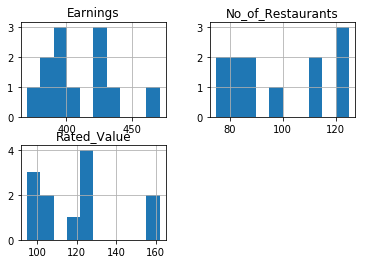

In [25]:
viz = df_final[['Earnings','No_of_Restaurants', 'Rated_Value']]
viz.hist()
plt.show()

## 4. Modeling

As we have the Rated Value data from 2006 to 2017, we have to predict what will be the rated value in 2018. we will use Linear Regression Machine Learning algorithm to predict the 2018 rated value.

We will be taking the Earnings data and Licensed Restaurants data of "Newham" borough as the Independant Variables (X - variables) and will predict the Rated Value of the same borough and this predicted rated value becomes our Depedant Variable(Y-Variable)

### 4.1 Simple Linear Regression Model
Linear Regression fits a linear model with coefficients θ=(θ1,...,θn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

Let's plot a Scatter Plot between these 2 features , with the Target variable "Rated Value"

**Plot between No of Restuarants and Rated value**

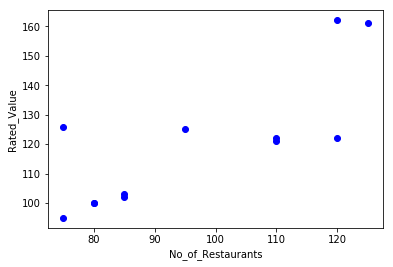

In [26]:
plt.scatter(df_final.No_of_Restaurants, df_final.Rated_Value, color='blue')
plt.xlabel("No_of_Restaurants")
plt.ylabel("Rated_Value")
plt.show()

**Plot between Earnings and Rated value**

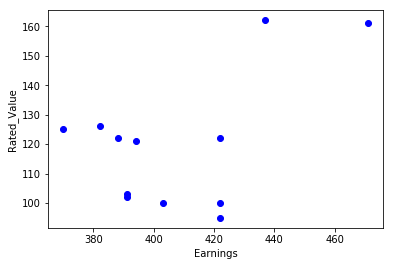

In [27]:
plt.scatter(df_final.Earnings, df_final.Rated_Value, color='blue')
plt.xlabel("Earnings")
plt.ylabel("Rated_Value")
plt.show()

### Conclusion:
    
From the above 2 Scatter Plots, it is observed that the Linear relationship exists between the Restaurants and the Rated Value. A scatter plot clearly shows the relation between variables where changes in one variable explain or possibly cause changes in the other variable. Also, it indicates that these variables are linearly related.

With linear regression you can fit a line through the data. For instance, as the number of restaurants increases, so do the Rated value. With linear regression you can model the relationship of these variables. A good model can be used to predict what the approximate rated value of the location.

### 4.2 Creating train and test dataset

As we do not have the Rated Value for the Year 2018 and we need to predict this value using the Simple Linear Regression model, hence we will remove this Year 2018 data from the final dataframe and prepare the Train and Test data from the remaining data

In [28]:
df_final=df_final.dropna()

In [29]:
msk = np.random.rand(len(df_final)) < 0.75
train = df_final[msk]
test = df_final[~msk]
print(train)

Code  Earnings  No_of_Restaurants  Rated_Value
Year                                          
2006     391.0                 85          102
2007     391.0                 85          103
2008     403.0                 80          100
2009     422.0                 75           95
2011     382.0                 75          126
2012     370.0                 95          125
2013     388.0                110          122
2014     394.0                110          121
2015     422.0                120          122
2016     437.0                120          162


In [30]:
print(test)

Code  Earnings  No_of_Restaurants  Rated_Value
Year                                          
2010     422.0                 80          100
2017     471.0                125          161


**Train Data Distribution**

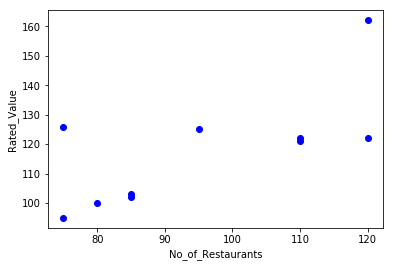

In [31]:
plt.scatter(train.No_of_Restaurants, train.Rated_Value,  color='blue')
plt.xlabel("No_of_Restaurants")
plt.ylabel("Rated_Value")
plt.show()

### 4.3 Coefficient and Intercept
Coefficient and Intercept in the Simple Linear Regression are the parameters of the fit line. Given that it is simple linear regression with only 2 parameters and knowing that the parameters are the intercept and slope of the line, using the python library SciKit Learn, we can estimate them directly from our data. The available data is divided into Train and Test data. The train data is used to train the model and the test data is used to evaluate the model.

In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["No_of_Restaurants"]])
train_y = np.asanyarray(train[["Rated_Value"]])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.74798973]]
Intercept:  [46.36698033]


**Draw the best fit line (Intercept line) to our train data**

Text(0, 0.5, 'Rated_Value')

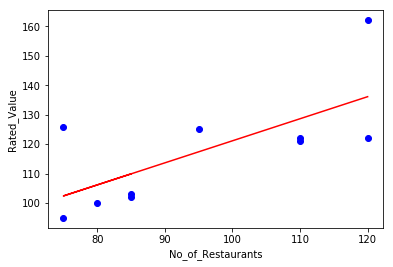

In [33]:
plt.scatter(train.No_of_Restaurants, train.Rated_Value,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("No_of_Restaurants")
plt.ylabel("Rated_Value")

### Conclusion:
By seeing the above Scatter Plot with a best possible fit line, the Rated Value in Newham borough for the year 2018 can be predicted somewhere between 160 to 165

## 5. Evaluation

In [34]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['No_of_Restaurants']])
test_y = np.asanyarray(test[['Rated_Value']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 13.67
Residual sum of squares (MSE): 242.59
R2-score: 0.14


### Conclusion:

Evaluation of the model is performed using the Evaluation Metrics such as Mean Absolute Error, Mean Squared Error and R-Squared. Due to very less available test data, the R-Squared for our model is not that great, but still we can consider our model for the prediction of the Rated Value for the year 2018. 

# Part:2 Create a new dataframe and it should consist of three columns: Postcode, Borough, and Neighborhood

## 1. Download and Read data of list_of_london_boroughs

Access the url & print the required table using __request.get()__ function

url: https://en.wikipedia.org/wiki/List_of_London_boroughs


**Import Required libraries**

In [35]:
import requests 
from bs4 import BeautifulSoup

### 1.1 Read List of London boroughs data from wikipedia Page using beautifulsoup package

In [36]:
source=requests.get("https://en.wikipedia.org/wiki/List_of_London_boroughs").text
soup=BeautifulSoup(source,"lxml") 

### 1.2 Create a for loop for itterating through the table to find the table data(Borough and Co-ordinates)

In [37]:
df_list = []

for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]: # "tr" is tag of html for defining table rows
    data = items.find_all(['td']) # td tag in html used to define the data in table
    data1 = data[0] # 1st column i.e. Borough
    data8 = data[8] # 9th column i.e Co-ordinates
    
    borough_name = data1.get_text()
    borough_name = borough_name.split('[') # it will break the given string by the specified separator(where '[' is mentioned in the string)        
    borough_name = borough_name[0]
    borough_name = borough_name.strip() #need to remove all the leading and trailing spaces from a string.

    # Co-ordinate data on portal is in DMS,decimal,geo uri,.... formats respectively, We need only decimal format 
    #51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /

    ll = data8.get_text()
    ll = ll.split('/') #it will break the given string by the specified separator.
    lat_long = ll[2]  # output format 51.5607; 0.1557﻿ (Barking and Dagenham)\n
    lat_long = lat_long.split('(') # output format 51.5607; 0.1557﻿ , Barking and Dagenham)\n
    lat_long = lat_long[0] # output format 51.5607; 0.1557﻿
    lat_long = lat_long.split(';') # output format [ 51.5607, 0.1557﻿ ]
    latitude = lat_long[0] # output format 51.5607
    latitude = latitude.strip() # output format 51.5607
    longitude = lat_long[1] # output format 0.1557﻿
    longitude = longitude.strip() # output format 0.1557﻿
    longitude = longitude.replace(u'\ufeff', '')
    latitude = float(latitude) #convert latitude to float
    longitude = float(longitude) # convert longitude to type float

    # Append the borough name, latitude and logitude in a list
    df_list.append((borough_name,latitude, longitude))

### 1.3 Create a Dataframe which contain Borough, Latitude and Longitude

In [38]:
df_data = pd.DataFrame(df_list, columns=['Borough', 'Latitude' , 'Longitude'])
print (df_data.shape)
print (df_data.dtypes)
df_data.head()

(32, 3)
Borough       object
Latitude     float64
Longitude    float64
dtype: object


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


## 2. Get the Latitude and Longitude of London City using geopy, Nominatim library

**Import Nominatim from geopy.geocoders , this will convert an address into latitude and longitude values**

**Note:** East and North values will be +ve & West and South values will be -ve in co-ordinates

In [39]:
from geopy.geocoders import Nominatim 

In [40]:
address = 'London'

geolocator = Nominatim(user_agent="London")
location = geolocator.geocode(address)
lon_latitude = location.latitude
lon_longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(lon_latitude, lon_longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


Co-ordinates are correct confirmed from google 51.5074° N, 0.1278° W

## 3. Create a map of London with Boroughs superimposed on top using Folium Library on df_data dataframe

In [41]:
import folium 

In [42]:
map_London= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df_data['Latitude'], df_data['Longitude'], df_data['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=5,
                        popup=label,
                        color='blue',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_London)

map_London

**Check the latitude and longitude of Newham Borough**

In [43]:
df_data.loc[df_data['Borough'] == 'Newham']

,Borough,Latitude,Longitude
23,Newham,51.5077,0.0469


# Part 3: Segmentation and Clustering(Newham)

Preferred location for Asian restuarant is Newham Borough, As the borough Newham is having high asian population, we will consider to Segment and Cluster only the neighbourhoods of this borough. For that we have to get the latitude and longitude details of all the areas(neighbourhoods) of Newham borough.

**Import Libraries**

In [44]:
from urllib.request import urlopen
import re

## 1. Downlaod and read the data from List_of_areas_of_london

### 1.1 Read the data of all the neighborhoods(areas) in Newham Borough 

URL: https://en.wikipedia.org/wiki/List_of_areas_of_London

In [45]:
source2 = requests.get(r"https://en.wikipedia.org/wiki/List_of_areas_of_London").text
soup = BeautifulSoup(source2,'lxml')

### 1.2 Read Table data from List_of_areas_of_london for Newham Borough 

In [46]:
codes = []
areas_list = []

for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data0 = data[0]
    area_name = data0.text

    data1 = data[1]
    data1 = data1.text
    borough = data1.split('[')
    borough_name = borough[0]
    data5 = data[5]
    code = data5.text
    code = code.strip()
    
    if borough_name == 'Newham':
        codes.append(code)
        areas_list.append((borough_name,area_name))

### 1.3 Create New dataframe for list of Borough(Newham) and its Neigborhood

In [47]:
Newham_borough = pd.DataFrame(areas_list, columns=['Borough', 'Neighborhood'])
print (Newham_borough.shape)
Newham_borough.head()
Newham_borough

(14, 2)


,Borough,Neighborhood
0,Newham,Beckton
1,Newham,Canning Town
2,Newham,Custom House
3,Newham,East Ham
4,Newham,Forest Gate
5,Newham,Little Ilford
6,Newham,Manor Park
7,Newham,Maryland
8,Newham,North Woolwich
9,Newham,Plaistow


## 2. Using OpenCageGeocode library of geocoder, find the lat and long of all areas of Newham borough and append in above dataframe

In [48]:
from opencage.geocoder import OpenCageGeocode
key = "68a7a7ad0e964bd895e494c3adde8855"  # get api key from:  https://opencagedata.com
geocoder = OpenCageGeocode(key)
query = 'Newham London'  
results = geocoder.geocode(query)
#print (results)
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
print (lat, lng)

51.5299995 0.029318


In [49]:
list_lat = []   # create empty lists
list_lng = []

for index, row in Newham_borough.iterrows(): # iterate over rows in dataframe
    Area = row['Borough']
    Code = row['Neighborhood']       
    query = str(Area)+','+str(Code)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    lng = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_lng.append(lng)

# create new columns from lists    
Newham_borough['Latitude'] = list_lat   
Newham_borough['Longitude'] = list_lng

In [50]:
Newham_borough

,Borough,Neighborhood,Latitude,Longitude
0,Newham,Beckton,51.516080,0.059426
1,Newham,Canning Town,51.518174,0.013498
2,Newham,Custom House,34.646730,-103.904410
3,Newham,East Ham,51.532963,0.055320
4,Newham,Forest Gate,51.549524,0.024925
5,Newham,Little Ilford,51.550298,0.062522
6,Newham,Manor Park,51.550687,0.047639
7,Newham,Maryland,51.546053,0.005922
8,Newham,North Woolwich,51.500407,0.064154
9,Newham,Plaistow,51.529380,0.024910


### 3. Find the Lat and long of Newham using Nominatim 

In [51]:
address = 'Newham, London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Newham are {}, {}.'.format(latitude, longitude))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Newham are 51.52999955, 0.0293179602938221.


### 4. Create map of Newham using latitude and longitude values from above data frame

In [52]:
map_Newham = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Newham_borough['Latitude'], Newham_borough['Longitude'], Newham_borough['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Newham)  
    
map_Newham

**Check the first Neighborhood(Area) in Newham Borough**

In [53]:
Newham_borough.loc[0]

Borough            Newham
Neighborhood      Beckton
Latitude          51.5161
Longitude       0.0594257
Name: 0, dtype: object

## 5. Define Foursquare credentials

In [54]:
CLIENT_ID = '3WAFTWT02PF3OQSVM0QQYVCJQXRHQL3GCEFUEI5TEJQEA4TC' # your Foursquare ID
CLIENT_SECRET = 'VZEMGEOKJDOWS4WT1LSMD3Z5OCMYXC3OTEAJ1JRUBGJEJYBP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT="2"

### 5.1 Explore Neighborhoods in Newham Borough

In [55]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius,LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([( name, lat, lng, 
                            v['venue']['name'], 
                            v['venue']['location']['lat'], 
                            v['venue']['location']['lng'],  
                            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue',
                             'Venue Latitude', 
                             'Venue Longitude',
                             'Venue Category']
    
    return(nearby_venues)

### 5.2 write the code to run the above function on each neighborhood and create a new dataframe called Newham venues

In [56]:
Newham_venues = getNearbyVenues(names=Newham_borough['Neighborhood'],
                               latitudes=Newham_borough['Latitude'],
                               longitudes=Newham_borough['Longitude'])
print(Newham_venues.shape)
Newham_venues.head()

(26, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beckton,51.516080,0.059426,East london Gymnastics Club,51.514107,0.060155,Gym / Fitness Center
1,Beckton,51.516080,0.059426,Home Bargains,51.516805,0.062804,Discount Store
2,Canning Town,51.518174,0.013498,Fitness4Less Canning Town,51.516424,0.009826,Gym
3,Canning Town,51.518174,0.013498,Secret Cinema,51.515953,0.007427,Movie Theater
4,Custom House,34.646730,-103.904410,Office Gym,34.646733,-103.904411,Gym / Fitness Center


**Check how many venues were returned for each neighborhood**

In [57]:
Newham_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beckton,2,2,2,2,2,2
Canning Town,2,2,2,2,2,2
Custom House,1,1,1,1,1,1
East Ham,2,2,2,2,2,2
Forest Gate,2,2,2,2,2,2
Little Ilford,1,1,1,1,1,1
Manor Park,2,2,2,2,2,2
Maryland,2,2,2,2,2,2
North Woolwich,2,2,2,2,2,2


**Let's find out how many unique categories can be curated from all the returned venues**

In [58]:
print('There are {} uniques categories.'.format(len(Newham_venues['Venue Category'].unique())))

There are 20 uniques categories.


## 6. Analyze Each Neighborhood

### 6.1 Use one hot encoding

In [59]:
# one hot encoding
Newham_onehot = pd.get_dummies(Newham_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Newham_onehot['Neighborhood'] = Newham_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Newham_onehot.columns[-1]] + list(Newham_onehot.columns[:-1])
Newham_onehot = Newham_onehot[fixed_columns]

print(Newham_onehot.shape)
Newham_onehot.head()

(26, 21)


,Neighborhood,Bakery,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym,Gym / Fitness Center,...,Indie Movie Theater,Indie Theater,Market,Movie Theater,Park,Pier,Pub,Restaurant,Theater,Tunnel
0,Beckton,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Beckton,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Canning Town,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Canning Town,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Custom House,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 6.2 let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [60]:
Newham_grouped = Newham_onehot.groupby('Neighborhood').mean().reset_index()
print(Newham_grouped.shape)
Newham_grouped.head()

(14, 21)


,Neighborhood,Bakery,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym,Gym / Fitness Center,...,Indie Movie Theater,Indie Theater,Market,Movie Theater,Park,Pier,Pub,Restaurant,Theater,Tunnel
0,Beckton,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Canning Town,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,Custom House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,East Ham,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
4,Forest Gate,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0


### 6.3  Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

### 6.4 Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [62]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Newham_grouped['Neighborhood']

for ind in np.arange(Newham_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Newham_grouped.iloc[ind, :], num_top_venues)


In [63]:
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(14, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Discount Store,Gym / Fitness Center,Tunnel,Theater,Bar,Breakfast Spot,Café,Fast Food Restaurant,Grocery Store,Gym
1,Canning Town,Movie Theater,Gym,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store
2,Custom House,Gym / Fitness Center,Tunnel,Theater,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym
3,East Ham,Pub,Fast Food Restaurant,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Grocery Store,Gym
4,Forest Gate,Bakery,Pub,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym


# 7. Cluster Neighborhoods

### 7.1 Run K-means algorithm to cluster the neighborhood into 5 clusters.

import k-means from sklearn.cluster

In [64]:
from sklearn.cluster import KMeans 

In [65]:
# set number of clusters
kclusters = 5
Newham_grouped_clustering = Newham_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Newham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 3, 2, 2, 1, 3, 0, 0, 2])

### 7.2 Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [66]:
Newham_merged = Newham_borough

# add clustering labels
Newham_merged['Cluster Labels'] = kmeans.labels_

# merge Neighborhoods dataframe with Newham borough dataframe to add latitude/longitude for each neighborhood
Newham_merged = Newham_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Newham_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Newham,Beckton,51.516080,0.059426,3,Discount Store,Gym / Fitness Center,Tunnel,Theater,Bar,Breakfast Spot,Café,Fast Food Restaurant,Grocery Store,Gym
1,Newham,Canning Town,51.518174,0.013498,0,Movie Theater,Gym,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store
2,Newham,Custom House,34.646730,-103.904410,3,Gym / Fitness Center,Tunnel,Theater,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym
3,Newham,East Ham,51.532963,0.055320,2,Pub,Fast Food Restaurant,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Grocery Store,Gym
4,Newham,Forest Gate,51.549524,0.024925,2,Bakery,Pub,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym


# Part: 4. Visualization

### 4.1 Let's Visualize the resulting clusters of Newham_merged() dataframe

import Matplotlib and associated plotting modules

In [67]:
import matplotlib.cm as cm 
import matplotlib.colors as colors

In [68]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
y = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(y)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Newham_merged['Latitude'], Newham_merged['Longitude'], Newham_merged['Neighborhood'], Newham_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],
                        radius=5,
                        popup=label,
                        color=rainbow[cluster-1],
                        fill=True,
                        fill_color=rainbow[cluster-1],
                        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Part:5 Examine the Clusters

In [69]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 0, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canning Town,Movie Theater,Gym,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store
7,Maryland,Indie Theater,Indie Movie Theater,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store
8,North Woolwich,Tunnel,Pier,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym
12,Upton Park,Indian Restaurant,Market,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym


In [70]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 1, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Little Ilford,Park,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym
10,Silvertown,Park,Theater,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store
13,West Ham,Breakfast Spot,Park,Tunnel,Gym / Fitness Center,Bar,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym


In [71]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 2, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,East Ham,Pub,Fast Food Restaurant,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Grocery Store,Gym
4,Forest Gate,Bakery,Pub,Gym / Fitness Center,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym
9,Plaistow,Pub,Café,Tunnel,Gym / Fitness Center,Bar,Breakfast Spot,Discount Store,Fast Food Restaurant,Grocery Store,Gym


In [72]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 3, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Discount Store,Gym / Fitness Center,Tunnel,Theater,Bar,Breakfast Spot,Café,Fast Food Restaurant,Grocery Store,Gym
2,Custom House,Gym / Fitness Center,Tunnel,Theater,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym
6,Manor Park,Gym / Fitness Center,Restaurant,Tunnel,Bar,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Grocery Store,Gym


In [73]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 4, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Stratford,Bar,Grocery Store,Tunnel,Theater,Breakfast Spot,Café,Discount Store,Fast Food Restaurant,Gym,Gym / Fitness Center


# Conclusion: 
After examining the above 5 clusters, we can recommend our stakeholders that Maryland is the best neighborhoods in Newham borough, to open their asian restuarant. This is because in these areas, the most common venue visited by the public is the restuarants and as these areas are highly populated with asians, opening an asian restuarant would definitley be a good idea.